# Projet IMA - Segmentation

In [1]:
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from math import sqrt
import copy
import scipy

### Définissons une fonction OpenImage qui permet d'ouvrir l'image à partir du path et qui la met en noir et blanc


In [2]:
def OpenImage(filepath):
    img = cv2.imread(filepath)
    img=img[:,:,0]
    #img=img[:,:,::-1]
    #plt.imshow(img)
    #plt.show()
    return img

im=viewimage("/home/paul/Bureau/ISIC_0000049.jpg")


NameError: name 'viewimage' is not defined

### Définissons maintenant une fonction AdjustIntensity qui permet d'augmenter le contraste en étalant les pixels sur l'ensemble de l'histogramme

In [85]:
def AdjustIntensity(im):
    im2 = im.flatten()
    im2.sort()
    onePercent = len(im2)//100
    petit = im2[onePercent]
    grand = im2[im2.shape[0] - onePercent]
    newIm = im.copy()
    (n, m) = (im.shape[0], im.shape[1])
    
    for i in range(0, n):
        for j in range(0, m):
            if (im[i][j] > grand):
                newIm[i][j] = 255
            elif (im[i][j]< petit):
                newIm[i][j] = 0
            else:
                newIm[i][j] = int((float(0 + (im[i][j] - petit) *255) / float(grand - petit)))

    return (newIm)

### Testons sur une image 

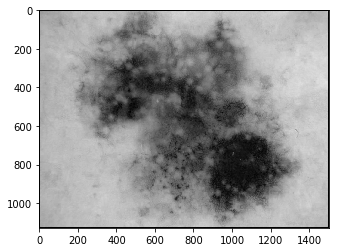

In [81]:
im=viewimage("/home/paul/Bureau/ISIC_0000049.jpg")
plt.imshow(im,cmap='gray')


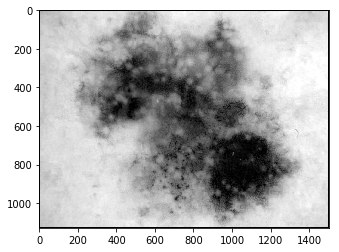

In [82]:
a=AdjustIntensity(im)
plt.imshow(a, cmap='gray')

### On voit que le contraste a bien augmenté, ce qui était l'effet recherché 



### Définissons maintenant la fonction Otsu
### Celle-ci recherche le meilleur seuil possible et applique le seuillage à l'image

In [96]:
def otsu(im):
    hist,_ = np.histogram(im,range(0,256))
    Variance = np.zeros(256)         
    for k in range (0,256): 
        omega_1 = hist[0:k].sum().astype(float)
        omega_2 = hist[k:-1].sum().astype(float)
        m1 = np.mean(im[im<=k])
        if (np.isnan(m1)):
            m1 = 0
        m2 = np.mean(im[im>k])
        if (np.isnan(m2)):
            m2 = 0
        Variance[k] = omega_1 * omega_2 * ( (m1 - m2)**2)
    seuil = np.argmax(Variance)
    
    im3=im.copy()
    n=len(im)
    m=len(im[0])
    for i in range(n):
        for j in range(m):
            if im[i][j]>seuil:
                im3[i][j]=255
            else:
                im3[i][j]=0
    return im3
         

/home/paul/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/paul/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


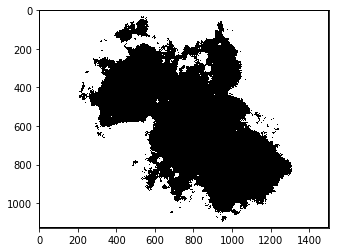

In [94]:
plt.imshow(otsu(a),cmap='gray')
